# BoxOffice 2018
## Descriptive Analysis

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import re
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline 

In [2]:
dft = pd.read_csv("./train.csv",encoding="utf8")
print(dft.shape)
print(dft.columns)
print(dft.dtypes)

(3000, 23)
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title              

In [3]:
for i in dft.columns:
    print(i+" : ")
    print(dft[i][0])
    print("\n")

id : 
1


belongs_to_collection : 
[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]


budget : 
14000000


genres : 
[{'id': 35, 'name': 'Comedy'}]


homepage : 
nan


imdb_id : 
tt2637294


original_language : 
en


original_title : 
Hot Tub Time Machine 2


overview : 
When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.


popularity : 
6.575392999999999


poster_path : 
/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg


production_companies : 
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]


production_countries : 
[{'iso_3166_1': 'US', 'name': 'United States of America'}]


release_date : 
2/20/15


runtime : 
93.0


spoken_languages : 
[{'iso_639_1': 'en', 'name': 'English'}]


status : 
Released


t

In [4]:
import ast

features_list = ['belongs_to_collection','genres','production_companies',
                 'production_countries','spoken_languages','Keywords','cast','crew']
dft[features_list] = dft[features_list].fillna('NA').copy()

def strToList(x):
    m = re.findall(r'\{.*\}',x)
    if m:
        l = list()
        for i in m:
            tmp = ast.literal_eval(i)
            l.append(tmp)
        return l
    else:
        return None

for i in features_list:
    dft[i+"_v2"]=dft[i].apply(lambda x:strToList(x))

In [5]:
dft.dtypes

id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
belongs_to_collection_v2     object
genres_v2                    object
production_companies_v2      object
production_countries_v2      object
spoken_languages_v2         

In [6]:
dft.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,belongs_to_collection_v2,genres_v2,production_companies_v2,production_countries_v2,spoken_languages_v2,Keywords_v2,cast_v2,crew_v2
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[{'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U...,"[{'id': 35, 'name': 'Comedy'}]","[({'id': 4, 'name': 'Paramount Pictures'}, {'i...","[{'name': 'United States of America', 'iso_316...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 4379, 'name': 'time travel'}, {'id': ...","[({'credit_id': '52fe4ee7c3a36847f82afae7', 'p...","[({'credit_id': '59ac067c92514107af02c8c8', 'p..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,[{'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl...,"[({'id': 35, 'name': 'Comedy'}, {'id': 18, 'na...","[{'id': 2, 'name': 'Walt Disney Pictures'}]","[{'name': 'United States of America', 'iso_316...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 2505, 'name': 'coronation'}, {'id': 4...","[({'credit_id': '52fe43fe9251416c7502561f', 'p...","[({'credit_id': '52fe43fe9251416c7502563d', 'p..."
2,3,NA,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,None,"[{'id': 18, 'name': 'Drama'}]","[({'id': 2266, 'name': 'Bold Films'}, {'id': 3...","[{'name': 'United States of America', 'iso_316...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 1416, 'name': 'jazz'}, {'id': 1523, '...","[({'credit_id': '52fe4ef7c3a36847f82b3fc3', 'p...","[({'credit_id': '54d5356ec3a3683ba0000039', 'p..."


In [7]:
quanti = ['runtime','budget','popularity','revenue']
dft[quanti].describe()

,runtime,budget,popularity,revenue
count,2998.000000,3.000000e+03,3000.000000,3.000000e+03
mean,107.856571,2.253133e+07,8.463274,6.672585e+07
std,22.086434,3.702609e+07,12.104000,1.375323e+08
min,0.000000,0.000000e+00,0.000001,1.000000e+00
25%,94.000000,0.000000e+00,4.018053,2.379808e+06
50%,104.000000,8.000000e+06,7.374861,1.680707e+07
75%,118.000000,2.900000e+07,10.890983,6.891920e+07
max,338.000000,3.800000e+08,294.337037,1.519558e+09


In [8]:
dft['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

## Features engineering
### Films Genres Feature

In [9]:
d_count = dict()

def aux(d_count, l):
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if d['name'] in d_count.keys():
                        d_count[d['name']] += 1
                    else:
                        d_count[d['name']] =1
            else:
                d = i
                if d['name'] in d_count.keys():
                    d_count[d['name']] += 1
                else:
                    d_count[d['name']] =1

dft['genres_v2'].apply(lambda x: aux(d_count,x))
    
genres = pd.DataFrame.from_dict({'Genres': list(d_count.keys()), 'Nb Films':list(d_count.values())})
genres = genres[['Genres','Nb Films']].copy()
top_genres = genres.nlargest(5, 'Nb Films')

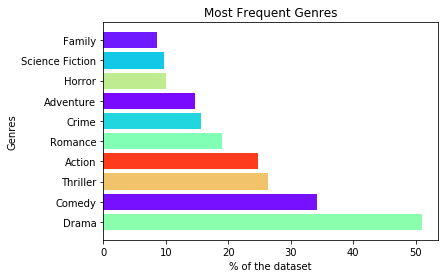

In [10]:
 def plot_graph(n_top,df,nbrow):
    top_df = df.nlargest(n_top, 'Nb Films')
    col = top_df.columns.tolist()
    
    def gen_list_random_colors(x):
        l = list()
        for i in range(x):
            a = random.uniform(0,1)
            if a in l:
                a = random.uniform(0,1)
            else:
                l.append(a)
        return l
    
    c =list(cm.rainbow(gen_list_random_colors(n_top)))
    fig, ax = plt.subplots()
    ax.barh(top_df[col[0]],(top_df[col[1]]/nbrow)*100,color=c)
    ax.set_title('Most Frequent '+col[0])
    plt.ylabel(col[0])
    plt.xlabel("% of the dataset")
    plt.show()
    
plot_graph(10,genres,dft.shape[0])

#### Creation of variables type of films which is a list with the different types of the films

In [11]:
def aux2(l):
    l_g = list()
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if not d['name'] in l_g:
                        l_g.append(d['name'])
                    else:
                        pass
            else:
                d=i
                if not d['name'] in l_g:
                        l_g.append(d['name'])
                else:
                    pass
        return l_g
    else: 
        return []

dft['genre_film'] = dft['genres_v2'].apply(lambda x: aux2(x))
dft['genre_film'].head()

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genre_film, dtype: object

In [12]:
def indic_var(x,c):
    if c in x:
        return 1
    else:
        return 0
        
g = top_genres['Genres'].tolist()
print(g)

g.sort()        
for i in g:
    dft["genre_"+i] = dft['genre_film'].apply(lambda x: indic_var(x,i))
    
dft.drop('genres_v2',axis=1,inplace=True)
dft.dtypes

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']


id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
belongs_to_collection_v2     object
production_companies_v2      object
production_countries_v2      object
spoken_languages_v2          object
Keywords_v2                 

### Production_companies Feature

In [13]:
d_count = dict()

dft['production_companies_v2'].apply(lambda x: aux(d_count,x))
    
prod_companies = pd.DataFrame.from_dict({'Prod_Company': list(d_count.keys()), 'Nb Films':list(d_count.values())})
prod_companies = prod_companies[['Prod_Company','Nb Films']].copy()
top_prod = prod_companies.nlargest(5, 'Nb Films')

**Top 10  Production Compagnies before correction**

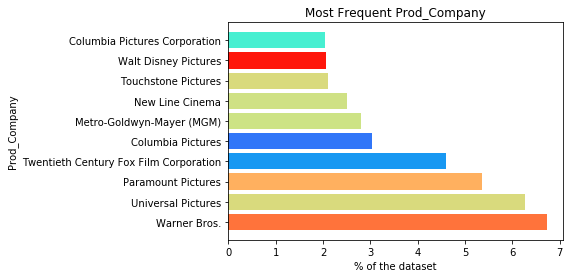

In [14]:
plot_graph(10,prod_companies,dft.shape[0])

#### **Top 10  Production Compagnies after correction**

In [15]:
def aux3(x,d1,d2):
    r = str.split(x," ")
    k = r[0]
    if "The" in r:
        k = k+" "+r[1]
    if k in d2.keys():
        d2[k]+=d1[x]
    else:
        d2[k]=d1[x]

best_prod = dict()
for i in d_count.keys():
    aux3(i,d_count,best_prod)


prod_companies_v2 = pd.DataFrame.from_dict({'Prod_Company': list(best_prod.keys()), 
                                            'Nb Films':list(best_prod.values())})
prod_companies_v2 = prod_companies_v2[['Prod_Company','Nb Films']].copy()
top_prod = prod_companies_v2.nlargest(5, 'Nb Films')

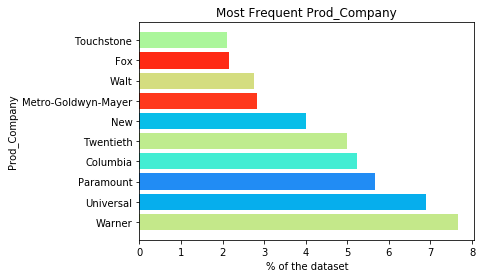

In [16]:
plot_graph(10,prod_companies_v2,dft.shape[0])

In [17]:
def aux3(l1,l2):
    l3 = list()
    if len(l1)>0:
        for i in l1:
            tmp = str.split(i," ")
            if tmp[0]=="The":
                if (tmp[0]+" "+tmp[1]) in l2:
                    l3.append(tmp[0]+" "+tmp[1])
            else:
                if tmp[0] in l2:
                    l3.append(tmp[0])
        return l3
    else:
        return l3
    
    
dft['best_prod'] = dft['production_companies_v2'].apply(lambda x: aux3(aux2(x),best_prod))
dft['best_prod'].head(10)

0    [Paramount, United, Metro-Goldwyn-Mayer]
1                                      [Walt]
2                    [Bold, Blumhouse, Right]
3                                          []
4                                          []
5                                          []
6                              [Ghost, North]
7                                          []
8                            [Walt, Jim, Jim]
9                                    [Castle]
Name: best_prod, dtype: object

In [18]:
for i in top_prod['Prod_Company'].tolist():
    dft["prod_"+i] = dft['best_prod'].apply(lambda x: indic_var(x,i))

dft.drop(['best_prod','production_companies_v2'],axis=1,inplace=True)    
dft.dtypes

id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
belongs_to_collection_v2     object
production_countries_v2      object
spoken_languages_v2          object
Keywords_v2                  object
cast_v2                     

### Spoken Languages Feature

In [19]:
d_count = dict()

dft['spoken_languages_v2'].apply(lambda x: aux(d_count,x))
    
spok_lang = pd.DataFrame.from_dict({'Spoken_Lang': list(d_count.keys()), 'Nb Films':list(d_count.values())})
spok_lang = spok_lang[['Spoken_Lang','Nb Films']].copy()
top_lang = spok_lang.nlargest(5, 'Nb Films')

**Top 10 Spoken languages**

['English' 'Français' 'Español' 'Deutsch' 'Pусский' 'Italiano' '日本語' '普通话'
 'हिन्दी' '']


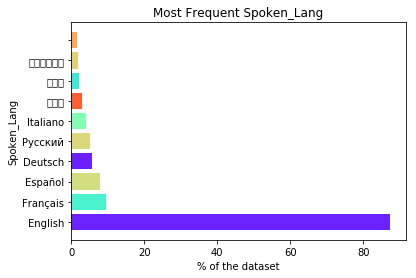

In [20]:
tmp = spok_lang.nlargest(10, 'Nb Films')
print(tmp['Spoken_Lang'].values)
plot_graph(10,spok_lang,dft.shape[0])

In [21]:
dft['lang_v2'] = dft['spoken_languages_v2'].apply(lambda x: aux2(x))

for i in top_lang['Spoken_Lang'].values.tolist():
    dft["lang_"+i] = dft['lang_v2'].apply(lambda x: indic_var(x,i))

dft.drop(['spoken_languages_v2'],axis=1,inplace=True)    
dft.dtypes

id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
belongs_to_collection_v2     object
production_countries_v2      object
Keywords_v2                  object
cast_v2                      object
crew_v2                     

### Belongs_to_collection Feature

In [22]:
d_count = dict()

dft['belongs_to_collection_v2'].apply(lambda x: aux(d_count,x))
    
coll = pd.DataFrame.from_dict({'Collection': list(d_count.keys()), 'Nb Films':list(d_count.values())})
coll = coll[['Collection','Nb Films']].copy()
top_coll = coll.nlargest(5, 'Nb Films')

**Top 10 Collections containing the most films**

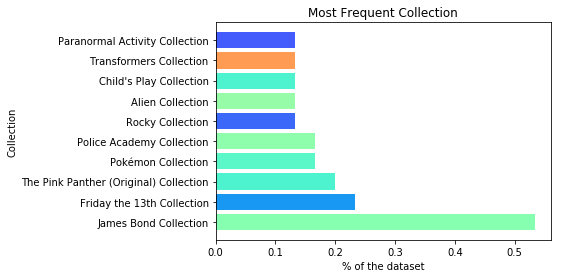

In [23]:
plot_graph(10,coll,dft.shape[0])

In [24]:
def ind_coll(x):
    if len(x)>0:
        return 1
    else:
        return 0

dft['indic_Coll'] = (dft['belongs_to_collection_v2'].apply(lambda x: aux2(x))).apply(lambda x: ind_coll(x))
dft.drop('belongs_to_collection_v2',axis=1,inplace=True)
dft.dtypes

id                           int64
belongs_to_collection       object
budget                       int64
genres                      object
homepage                    object
imdb_id                     object
original_language           object
original_title              object
overview                    object
popularity                 float64
poster_path                 object
production_companies        object
production_countries        object
release_date                object
runtime                    float64
spoken_languages            object
status                      object
tagline                     object
title                       object
Keywords                    object
cast                        object
crew                        object
revenue                      int64
production_countries_v2     object
Keywords_v2                 object
cast_v2                     object
crew_v2                     object
genre_film                  object
genre_Action        

### Keywords Feature

In [25]:
d_count = dict()
dft['Keywords_v2'].apply(lambda x: aux(d_count,x))
    
keywords = pd.DataFrame.from_dict({'Keyword': list(d_count.keys()), 'Nb Films':list(d_count.values())})
keywords = keywords[['Keyword','Nb Films']].copy()
top_key = keywords.nlargest(5, 'Nb Films')

**Top 20 Keywords**

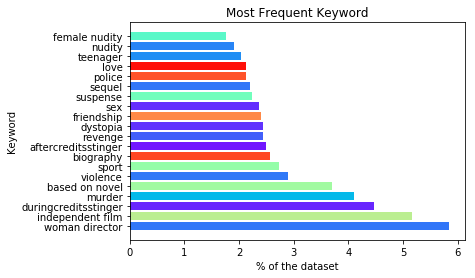

In [26]:
plot_graph(20,keywords,dft.shape[0])

In [27]:
dft['Key_list'] = dft['Keywords_v2'].apply(lambda x: aux2(x))
dft['Key_list'].head()

0    [time travel, sequel, hot tub, duringcreditsst...
1        [coronation, duty, marriage, falling in love]
2    [jazz, obsession, conservatory, music teacher,...
3    [mystery, bollywood, police corruption, crime,...
4                                                   []
Name: Key_list, dtype: object

In [28]:
for i in top_key['Keyword'].values.tolist():
    dft["Key_"+i] = dft['Key_list'].apply(lambda x: indic_var(x,i))

dft.drop(['Keywords_v2'],axis=1,inplace=True)    
dft.dtypes

id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
production_countries_v2      object
cast_v2                      object
crew_v2                      object
genre_film                   object
genre_Action                

### Cast Feature

In [29]:
d_count = dict()
dft['cast_v2'].apply(lambda x: aux(d_count,x))

cast = pd.DataFrame.from_dict({'Actors': list(d_count.keys()), 'Nb Films':list(d_count.values())})
cast = cast[['Actors','Nb Films']].copy()
top_actors = cast.nlargest(5, 'Nb Films')

**Top 20 Actors with the most films**

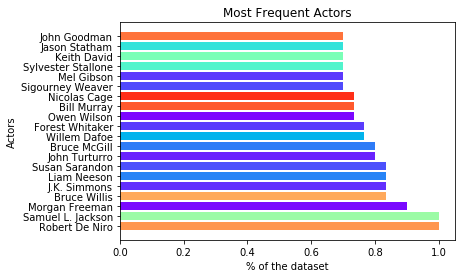

In [30]:
plot_graph(20,cast,dft.shape[0])

In [31]:
dft['actors_list'] = dft['cast_v2'].apply(lambda x: aux2(x))
dft['actors_list'].head()

0    [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1    [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2    [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3    [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4    [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
Name: actors_list, dtype: object

In [32]:
for i in top_actors['Actors'].values.tolist():
    dft["Act_"+i] = dft['actors_list'].apply(lambda x: indic_var(x,i))

dft.drop(['cast_v2'],axis=1,inplace=True)    
dft.dtypes

id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
production_countries_v2      object
crew_v2                      object
genre_film                   object
genre_Action                  int64
genre_Comedy                

### Crew Feature

In [33]:
d_count = dict()

def aux_2(d_count, l):
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if (d['job'],d['name']) in d_count.keys():
                        d_count[(d['job'],d['name'])] += 1
                    else:
                        d_count[(d['job'],d['name'])] =1
            else:
                d = i
                if (d['job'],d['name']) in d_count.keys():
                    d_count[(d['job'],d['name'])] += 1
                else:
                    d_count[(d['job'],d['name'])] =1

dft['crew_v2'].apply(lambda x: aux_2(d_count,x))

crew = pd.DataFrame.from_dict({'Staff': list(d_count.keys()), 'Nb Films':list(d_count.values())})
crew = crew[['Staff','Nb Films']].copy()
top_staff = crew.nlargest(5, 'Nb Films')

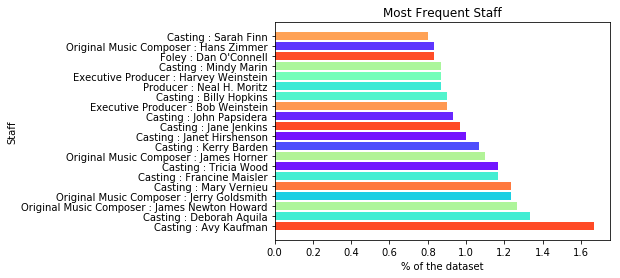

In [34]:
def plot_graph_2(n_top,df,nbrow):
    top_df = df.nlargest(n_top, 'Nb Films')
    col = top_df.columns.tolist()
    
    def gen_list_random_colors(x):
        l = list()
        for i in range(x):
            a = random.uniform(0,1)
            if a in l:
                a = random.uniform(0,1)
            else:
                l.append(a)
        return l
    
    def role(x):
        return x[0]+" : "+x[1]
    
    res = top_df[col[0]].apply(role)
    
    c =list(cm.rainbow(gen_list_random_colors(n_top)))
    fig, ax = plt.subplots()
    ax.barh(res,(top_df[col[1]]/nbrow)*100,color=c)
    ax.set_title('Most Frequent '+col[0])
    plt.ylabel(col[0])
    plt.xlabel("% of the dataset")
    plt.show()

plot_graph_2(20,crew,dft.shape[0])

In [35]:
dft['crew_list'] = dft['crew_v2'].apply(lambda x: aux2(x))
dft['crew_list'].head()

0    [Kelly Cantley, Steve Pink, Josh Heald, Andrew...
1    [Garry Marshall, Charles Minsky, John Debney, ...
2    [Terri Taylor, Richard Henderson, Jeffrey Stot...
3                                        [Sujoy Ghosh]
4                                     [Jong-seok Yoon]
Name: crew_list, dtype: object

In [36]:
for i in top_staff['Staff'].values.tolist():
    print(i[1])
    dft["Crew_"+i[1]] = dft['crew_list'].apply(lambda x: indic_var(x,i[1]))

dft.drop(['crew_v2'],axis=1,inplace=True)    
dft.dtypes

Avy Kaufman
Deborah Aquila
James Newton Howard
Jerry Goldsmith
Mary Vernieu


id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
production_countries_v2      object
genre_film                   object
genre_Action                  int64
genre_Comedy                  int64
genre_Drama                 

In [37]:
my_df = dft.select_dtypes(include=['int32','int64','float']).copy()

my_df.columns

Index(['id', 'budget', 'popularity', 'runtime', 'revenue', 'genre_Action',
       'genre_Comedy', 'genre_Drama', 'genre_Romance', 'genre_Thriller',
       'prod_Warner', 'prod_Universal', 'prod_Paramount', 'prod_Columbia',
       'prod_Twentieth', 'lang_English', 'lang_Français', 'lang_Español',
       'lang_Deutsch', 'lang_Pусский', 'indic_Coll', 'Key_woman director',
       'Key_independent film', 'Key_duringcreditsstinger', 'Key_murder',
       'Key_based on novel', 'Act_Robert De Niro', 'Act_Samuel L. Jackson',
       'Act_Morgan Freeman', 'Act_Bruce Willis', 'Act_J.K. Simmons',
       'Crew_Avy Kaufman', 'Crew_Deborah Aquila', 'Crew_James Newton Howard',
       'Crew_Jerry Goldsmith', 'Crew_Mary Vernieu'],
      dtype='object')

In [38]:
my_df.isna().sum()

id                          0
budget                      0
popularity                  0
runtime                     2
revenue                     0
genre_Action                0
genre_Comedy                0
genre_Drama                 0
genre_Romance               0
genre_Thriller              0
prod_Warner                 0
prod_Universal              0
prod_Paramount              0
prod_Columbia               0
prod_Twentieth              0
lang_English                0
lang_Français               0
lang_Español                0
lang_Deutsch                0
lang_Pусский                0
indic_Coll                  0
Key_woman director          0
Key_independent film        0
Key_duringcreditsstinger    0
Key_murder                  0
Key_based on novel          0
Act_Robert De Niro          0
Act_Samuel L. Jackson       0
Act_Morgan Freeman          0
Act_Bruce Willis            0
Act_J.K. Simmons            0
Crew_Avy Kaufman            0
Crew_Deborah Aquila         0
Crew_James

In [39]:
my_df['runtime'].head()

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
Name: runtime, dtype: float64

In [40]:
from sklearn.impute import SimpleImputer
my_df[['runtime']] = SimpleImputer(np.nan,strategy = 'mean').fit_transform(my_df[['runtime']])



my_df['status'] = dft['status'].copy()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
my_df['status_v2'] = encoder.fit_transform(my_df['status'])

In [41]:
my_df.columns

Index(['id', 'budget', 'popularity', 'runtime', 'revenue', 'genre_Action',
       'genre_Comedy', 'genre_Drama', 'genre_Romance', 'genre_Thriller',
       'prod_Warner', 'prod_Universal', 'prod_Paramount', 'prod_Columbia',
       'prod_Twentieth', 'lang_English', 'lang_Français', 'lang_Español',
       'lang_Deutsch', 'lang_Pусский', 'indic_Coll', 'Key_woman director',
       'Key_independent film', 'Key_duringcreditsstinger', 'Key_murder',
       'Key_based on novel', 'Act_Robert De Niro', 'Act_Samuel L. Jackson',
       'Act_Morgan Freeman', 'Act_Bruce Willis', 'Act_J.K. Simmons',
       'Crew_Avy Kaufman', 'Crew_Deborah Aquila', 'Crew_James Newton Howard',
       'Crew_Jerry Goldsmith', 'Crew_Mary Vernieu', 'status', 'status_v2'],
      dtype='object')

## Prediction of Revenue

In [42]:
Y = my_df['revenue']

X_vo = my_df.drop('revenue',axis=1)
print("X shape : "+str(X_vo.shape))

X shape : (3000, 37)


In [43]:
features_select = X_vo.columns.tolist()
features_select.remove('id')
features_select.remove('status')

print(features_select)

['budget', 'popularity', 'runtime', 'genre_Action', 'genre_Comedy', 'genre_Drama', 'genre_Romance', 'genre_Thriller', 'prod_Warner', 'prod_Universal', 'prod_Paramount', 'prod_Columbia', 'prod_Twentieth', 'lang_English', 'lang_Français', 'lang_Español', 'lang_Deutsch', 'lang_Pусский', 'indic_Coll', 'Key_woman director', 'Key_independent film', 'Key_duringcreditsstinger', 'Key_murder', 'Key_based on novel', 'Act_Robert De Niro', 'Act_Samuel L. Jackson', 'Act_Morgan Freeman', 'Act_Bruce Willis', 'Act_J.K. Simmons', 'Crew_Avy Kaufman', 'Crew_Deborah Aquila', 'Crew_James Newton Howard', 'Crew_Jerry Goldsmith', 'Crew_Mary Vernieu', 'status_v2']


### PCA

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


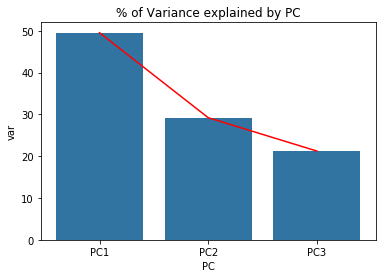

In [44]:
X_vo.to_pickle("./my_df")

X = X_vo.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[['budget','popularity','runtime']] = scaler.fit_transform(X_vo[['budget','popularity','runtime']])

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X2D = pca.fit_transform(X[['budget','popularity','runtime']])

pca_df = pd.DataFrame(data = X2D , 
        columns = ['PC'+str(i+1) for i in range(0,3)])

df_var_pca = pd.DataFrame({'var':pca.explained_variance_ratio_*100,
             'PC':['PC'+str(i+1) for i in range(0,3)]})

ax1 = sns.barplot(x='PC',y="var", data=df_var_pca, color='C0').set_title("% of Variance explained by PC")
ax2 = sns.lineplot(data=df_var_pca['var'],color="r")
# sns_plot.figure.savefig("./output.png")

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


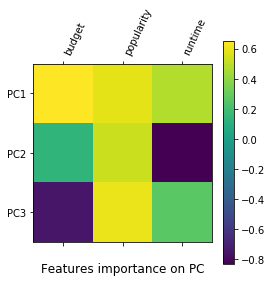

In [45]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([i for i in range(0,3)],['PC'+str(i+1) for i in range(0,3)],fontsize=10)
plt.colorbar()
plt.title("Features importance on PC",y=-0.2)
plt.xticks(range(3),['budget','popularity','runtime'],rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [46]:
#Selecting worst features
# worst_features=features_select[8:]

# worst_features

#### Analysis correlation between the worst features

In [47]:
# s=sns.heatmap(X[worst_features].corr(),cmap='coolwarm') 
# s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
# s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
# plt.show()

### MCA

In [74]:
features_selQuali = features_select[3:]
features_selQuali

import prince
mca = prince.MCA(n_components=len(features_selQuali), n_iter=3,copy=True,check_input=True
                 ,engine='auto',random_state=42)
mca = mca.fit(X[features_selQuali])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


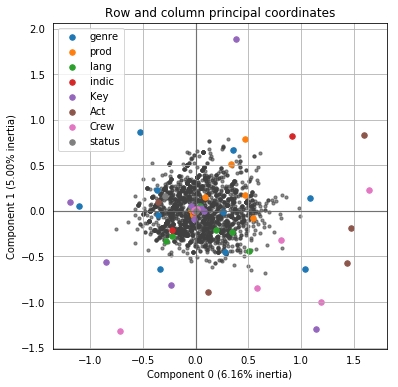

In [75]:
ax = mca.plot_coordinates(X=X[features_selQuali],ax=None,figsize=(6, 6),show_row_points=True,
                          row_points_size=10,show_row_labels=False,show_column_points=True,
                          column_points_size=30,show_column_labels=False,legend_n_cols=1)
ax.get_figure().savefig('./mca_coordinates.svg')

### ANOVA

In [79]:
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('Y ~ C(X)', data=df).fit()
results.summary()

SyntaxError: invalid syntax (ttest.py, line 148)

#### Changing the features of the model

In [51]:
# features_select = features_select[:] #???

# X = pd.DataFrame(X2D[:,:5],columns=['PC'+str(i+1) for i in range(0,5)])
# print(X.head())

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [49]:
# plt.matshow(pca.components_,cmap='viridis')
# plt.yticks([i for i in range(0,8)],['PC'+str(i+1) for i in range(0,8)],fontsize=10)
# plt.colorbar()
# plt.title("Features importance on PC",y=-0.2)
# plt.xticks(range(len(features_select)),features_select,rotation=65,ha='left')
# plt.tight_layout()
# plt.show()# 

### Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[100,200], 'criterion':['mse'], 
               'max_depth':[80,100],'bootstrap':[True], 'oob_score':[True]}]

clf = RandomForestRegressor(random_state=42,n_jobs=-1,verbose=3)

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm

# Fit the grid search to the data
grid_search.fit(X_train[features_select],Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80, score=0.6362204053186082, total=   0.9s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 5

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s re

[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80, score=0.6905056438862753, total=   1.1s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80, score=0.6565664609869486, total=   0.8s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=80 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80, score=0.6361061691193424, total=   2.0s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 5

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80, score=0.6963599720579373, total=   1.8s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 5

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80, score=0.6662371869352892, total=   1.9s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80, score=0.622281087950407, total=   1.8s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=80, score=0.6967438598424549, total=   1.7s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=100 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=100, score=0.6362204053186082, total=   0.8s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=100 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
buildi

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=100, score=0.6565664609869486, total=   0.8s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=100, max_depth=100 
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
buildi

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100, score=0.6963599720579373, total=   1.7s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100, score=0.6662371869352892, total=   1.7s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100, score=0.622281087950407, total=   1.7s
[CV] criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100 
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 5

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   28.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


[CV]  criterion=mse, bootstrap=True, oob_score=True, n_estimators=200, max_depth=100, score=0.6967438598424549, total=   1.7s
building tree 1 of 200
building tree 2 of 200
building tree 3 of 200building tree 4 of 200

building tree 5 of 200
building tree 6 of 200
building tree 7 of 200building tree 8 of 200

building tree 9 of 200building tree 10 of 200

building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200building tree 16 of 200

building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200building tree 26 of 200

building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s



building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200building tree 70 of 200

building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building 

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    0.5s



building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200building tree 170 of 200

building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=42, verbose=3, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['mse'], 'max_depth': [80, 100], 'oob_score': [True], 'n_estimators': [100, 200], 'bootstrap': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [60]:
print(grid_search.best_params_)

def evaluate(model, test_features, test_labels):
    # Use the forest's predict method on the test data
    predictions = model.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * np.mean(errors / test_labels)
    
    # Calculate and display accuracy
    accuracy = 100 - mape
    
    print('Model Performance')
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test[features_select],Y_test)

{'criterion': 'mse', 'bootstrap': True, 'oob_score': True, 'n_estimators': 200, 'max_depth': 80}
Model Performance
Mean Absolute Error: 37359386.7521 degrees.
Accuracy = -1766637.25%.


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
